# 개발 환경 설정 및 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Covid Data.csv')

In [ ]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


---
# 데이터 정보 

In [ ]:
# 전체 데이터 정보 간략하게 추출

df.info()

In [ ]:
# 해당 데이터의 칼럼명만 추출

df.columns

In [ ]:
# 칼럼을 기준으로 데이터 분포 확인하기

for i in df.columns :
  print(i)
  print("-------------------------")
  print(df[i].value_counts())
  print("-------------------------\n")

In [ ]:
# 널값이 존재하는지 확인

df.isnull().sum()

In [ ]:
# 칼럼 데이터들의 Unique한 값이 몇개인지 확인하기

for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))


# 데이터 분석 결과


* ##   결측값이 많은 대부분인 값
  *   PREGNANT
  *   ICU
  *   INTUBED

---
* ###  PREGNANT 관한 분석
* ###  ICU에 관한 분석
* ###  INTUBED에 관한 분석

  #### 이 요구된다.


---
# PREGNANT 관한 데이터 분석

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

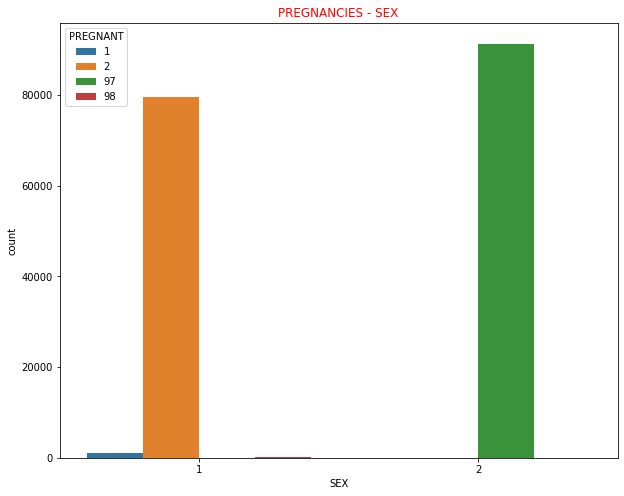

In [ ]:
plt.figure()
ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
plt.title("PREGNANCIES - SEX",color="red");

In [ ]:
df['PREGNANT'].value_counts()

97    91376
2     79709
1      1096
98       96
Name: PREGNANT, dtype: int64

In [ ]:
df[(df['SEX'] == 1) & (df['PREGNANT'] == 97)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


In [ ]:
# 결측값이 97일 경우 성별이 모두 남자인 것을 확인할 수 있다.
df[(df['SEX'] == 2) & (df['PREGNANT'] == 97)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
11,2,1,2,2,9999-99-99,2,2,24,97,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
12,2,1,2,2,9999-99-99,2,2,30,97,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172270,2,4,2,1,9999-99-99,97,2,22,97,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,6.0,97.0
172273,2,4,2,1,9999-99-99,97,2,30,97,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,97.0
172274,2,4,2,1,9999-99-99,97,2,25,97,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,97.0
172275,2,4,2,1,9999-99-99,97,2,44,97,2,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,6.0,97.0


In [ ]:
df[(df['SEX'] == 2) & (df['PREGNANT'] == 98)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


In [ ]:
# PREGNANT 결측값이 98인 경우 모두 여자인 것을 확인할 수 있다.
df[(df['SEX'] == 1) & (df['PREGNANT'] == 98)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
433,1,3,1,2,29/04/2020,2,1,62,98,2,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0
1882,2,3,1,1,9999-99-99,97,2,20,98,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,97.0
5011,2,3,1,1,9999-99-99,97,2,55,98,1,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
5466,1,3,1,1,9999-99-99,97,2,32,98,2,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,97.0
7980,2,3,1,1,9999-99-99,97,2,30,98,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171150,1,4,1,1,9999-99-99,97,2,36,98,2,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,6.0,97.0
171177,1,4,1,1,9999-99-99,97,2,34,98,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,97.0
171179,1,4,1,1,9999-99-99,97,2,46,98,2,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,6.0,97.0
171549,1,4,1,1,9999-99-99,97,2,32,98,2,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,6.0,97.0


# ICU에 관한 데이터 분석

ICU 데이터 -> 환자가 중환자실에 입원했는지 여부를 나타냅니다.

In [ ]:
plt.figure()
ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(df.ICU, hue = df.PATIENT_TYPE)
plt.title("ICU - PATIENT_TYPE",color="red");

In [ ]:
df['ICU'].value_counts()

In [ ]:
df[(df['ICU'] == 97) & (df['PATIENT_TYPE'] == 1)]

In [ ]:
df[(df['ICU'] == 97) & (df['PATIENT_TYPE'] == 2)]

# ICU 가 97인 경우 사람들이 다 입원하지 않았다.. -> ICU가 97인 값은 0으로 대체가 가능하다(입원을 하지 않았는데 중환자실에 있을 경우가 없기 때문에) 

In [ ]:
df[(df['ICU'] == 99) & (df['PATIENT_TYPE'] == 2)]

In [ ]:
df[(df['ICU'] == 99) & (df['PATIENT_TYPE'] == 1)]

# ICU가 99인 경우 다 입원해있다.. -> 이 사람들이 중환자인지 아닌지 알 수 있는 방법이 없다.

In [ ]:
ratio = [len(df.query('(ICU == 1) & (DATE_DIED != "9999-99-99")')),8663]
labels = ['DEAD',  'ALIVE']

plt.pie(ratio, labels=labels, autopct='%.1f%%',startangle=30)
plt.title("ICU: 중환자실",color="green", size= 20)
plt.show()

# INTUBED에 대한 분석



INTUBED 데이터 -> 환자가 인공호흡기에 연결되었는지 여부.

In [ ]:
plt.figure()
ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(df.INTUBED, hue = df.PATIENT_TYPE)
plt.title("INTUBED - PATIENT_TYPE",color="red");

In [ ]:
df['INTUBED'].value_counts()

In [ ]:
df[(df['INTUBED'] == 97) & (df['PATIENT_TYPE'] == 1)]

In [ ]:
df[(df['INTUBED'] == 97) & (df['PATIENT_TYPE'] == 2)]

# INTUBED 가 97인 경우 사람들 중 입원한 사람이 없다 -> INTUBED 97인 값은 2으로 대체가 가능하다
# (입원을 하지 않았는데 호흡기를 끼는 경우는 있을 경우가 없기 때문에) 

In [ ]:
df[(df['INTUBED'] == 99) & (df['PATIENT_TYPE'] == 1)]

In [ ]:
df[(df['INTUBED'] == 99) & (df['PATIENT_TYPE'] == 2)]
# INTUBED 99인 경우 사람들이 다 입원해있는 상태이다. -> 이 사람들이 호흡기를 꼇는지 안꼇는지 알 수 있는 방법이 없다.

In [ ]:
ratio = [len(df.query('(INTUBED == 1) & (DATE_DIED != "9999-99-99")')),7275]
labels = ['DEAD',  'ALIVE']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title("INTUBED: 인공호흡기",color="green", size= 25)
plt.show()

---
# 데이터 상관관계 분석

> DIABETES~TOBACCO 까지 상관성이 비정상적으로 너무 높음.

> 결측값으로 인해 중복된 데이터가 많아 상관성이 높은 것을 확인할 수 있음

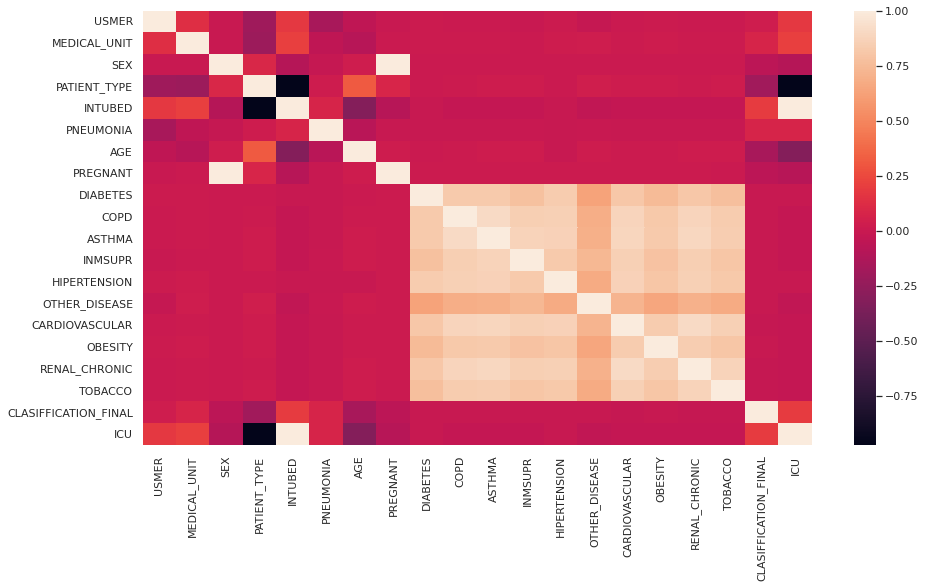

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

---
# 데이터 공통 부분 전처리

---
PREGNANT 데이터 특성

*   결측값이 97이 존재한다. 하지만 97인 경우 다 남자인 것을 확인할 수 있다.
*   결측값이 98이 존재한다. 이 데이터의 경우 다 여자인 것을 확인할 수 있다.





In [ ]:
# PREGNANT 전처리
df.PREGNANT = df.PREGNANT.replace(97,2)
df = df.drop(df[df['PREGNANT'] == 98].index)

In [ ]:
# PREGNANT 전처리 확인
df.PREGNANT.value_counts()

2    1036690
1       8131
Name: PREGNANT, dtype: int64

---
ICU 데이터 특성

*   결측값이 97이 존재한다. 하지만 97인 경우 다 입원을 안한 데이터임을 확인할 수 있다.
*   결측값이 99가 존재한다. 이 데이터인 경우 다 입원을 한 데이터임을 확인할 수 있다.



In [ ]:
# ICU 전처리 확인
df.ICU.value_counts()

97    845277
2     175386
1      16830
99      7328
Name: ICU, dtype: int64

In [ ]:
# ICU 전처리
df.ICU = df.ICU.replace(97, 2)
df = df.drop(df[df['ICU'] == 99].index)

In [ ]:
# ICU 전처리 확인
df.ICU.value_counts()

2    1020663
1      16830
Name: ICU, dtype: int64

---
INTUBED 데이터 특성

*   결측값이 97이 존재한다. 하지만 97인 경우 다 입원을 안한 데이터임을 확인할 수 있다.
*   결측값이 99가 존재한다. 이 데이터인 경우 다 입원을 한 데이터임을 확인할 수 있다.



In [ ]:
# INTUBED 전처리
df.INTUBED = df.INTUBED.replace(97, 2)
df = df.drop(df[df['INTUBED'] == 99].index)

In [ ]:
# INTUBED 전처리 확인
df.INTUBED.value_counts()

2    1003936
1      33555
Name: INTUBED, dtype: int64

---
Died_DATE 데이터 특성


*   환자가 사망한 경우 사망 날짜를 표시한다.
*   환자가 사망하지 않았을 경우 9999-99-99를 표시합니다.



In [ ]:
df['DEATH'] = df['DATE_DIED'].apply(lambda x : 2 if x == '9999-99-99' else 1)

In [ ]:
df.drop(['DATE_DIED'], axis=1, inplace=True)

In [ ]:
df['DEATH'].value_counts()

2    962707
1     74784
Name: DEATH, dtype: int64

---
MEDICAL_UNIT 데이터 특성

*   의료 서비스를 제공하는 국가 보건 시스템의 기관 유형.
*   1 ~ 13까지의 값이 존재한다.
*   해당 값들이 어떤 것을 의미하며 숫자에 따라 어떻게 바뀌는지에 대한 정확한 정보가 없다.

In [ ]:
# MEDICAL_UNIT 전처리
df.drop(['MEDICAL_UNIT'], axis=1, inplace=True)

In [ ]:
# # MEDICAL_UNIT 전처리 확인
# df.MEDICAL_UNIT.value_counts()

---
CLASIFFICATION_FINAL 데이터 특성

*   1 ~ 3까지는 확실하게 코로나에 걸린 데이터이다. -> 하지만 어떻게 중증 환자인지에 대한 정보는 나와있지 않다.
*   4 이상은 환자가 코로나 바이러스 감염자가 아니거나 검사 결과가 불확실하다는 것을 의미한다.

In [ ]:
# CLASIFFICATION_FINAL 전처리
df['COVID_19'] = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df['COVID_19'] = df.COVID_19.replace([4,5,6,7], 2)
df.drop(['CLASIFFICATION_FINAL'], axis=1, inplace=True)

In [ ]:
df['COVID_19'] .value_counts()

2    648416
1    389075
Name: COVID_19, dtype: int64

65세 이상(고령자 기준)이고 코로나에 걸린지 애매한 사람들 -> 코로나가 아닌 다른 질병에 의해 고위험군이 확률이 다른 나이에 비해 많다.

In [ ]:
# 나이 접근 - WTO(예)
df[(df['AGE'] > 65) & (df['COVID_19'] == 2)]

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DEATH,COVID_19
1,2,2,1,2,1,72,2,2,2,2,2,1,2,2,1,1,2,2,1,2
72,2,2,1,2,2,66,2,2,2,2,2,1,2,2,2,2,2,2,2,2
84,2,2,2,2,2,90,2,2,2,2,2,2,2,2,2,2,2,2,2,2
106,2,1,1,2,2,66,2,2,2,2,2,1,2,2,2,2,2,2,2,2
117,2,1,1,2,1,80,2,2,2,2,2,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048519,1,2,2,2,2,69,2,2,2,2,2,1,2,2,2,2,1,2,2,2
1048535,1,1,2,2,2,79,2,2,2,2,2,1,2,2,2,2,2,2,2,2
1048540,1,1,1,2,2,80,2,1,2,2,1,1,2,2,2,2,2,2,2,2
1048549,1,2,1,2,2,66,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
# 나이가 65 이상이고 코로나에 걸린지 애매한 사람들 제거
idx = df[(df['AGE']>=65) & (df['COVID_19'] == 2)].index
df.drop(idx, inplace=True)

In [ ]:
# 나이가 65 이상이고 코로나에 걸린지 애매한 사람들 확인
df[(df['AGE'] > 65) & (df['COVID_19'] == 2)]

,USMER,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DEATH,COVID_19


In [ ]:
# 전체적인 컬럼의 결측값 전처리
# 이 컬럼의 경우 결측값이 존재하긴 하지만 해당 결측값이 비율이 현저히 적기 때문에 결측값을 따로 처리하는 것이 아닌 Drop하는 것으로 처리했습니다.

df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

---
# 데이터 전처리 1 : Dead Column을 target vector로 사용

---
# 데이터 전처리 2 : AT_RISK을 target vector로 사용

In [ ]:
df.DEATH = df.DEATH.apply(lambda x: x if x == 1 else 0)
df.INTUBED = df.INTUBED.apply(lambda x: x if x == 1 else 0)  
df.ICU = df.ICU.apply(lambda x: x if x == 1 else 0)

In [ ]:
df['AT_RISK'] = df['DEATH'] + df['INTUBED'] + df['ICU']

# 1개라도 해당 사항이 있을 경우
df['AT_RISK'] =  df['AT_RISK'].apply(lambda x: 1 if x >= 1  else 2)

In [ ]:
df['AT_RISK'].value_counts()

2    894401
1     75239
Name: AT_RISK, dtype: int64

In [ ]:
df.drop(['DEATH'], axis=1, inplace=True)
df.drop(['INTUBED'], axis=1, inplace=True)
df.drop(['ICU'], axis=1, inplace=True)

---
# 데이터 전처리 결과 확인

In [ ]:
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'COVID_19', 'AT_RISK'],
      dtype='object')

In [ ]:
df

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_19,AT_RISK
0,2,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1,1
2,2,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,2,1
4,2,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1,1
5,2,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,2,2
1048572,2,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
for i in df.columns :
  print(i)
  print("-------------------------")
  print(df[i].value_counts())
  print("-------------------------\n")

USMER
-------------------------
2    626052
1    343588
Name: USMER, dtype: int64
-------------------------

SEX
-------------------------
1    485237
2    484403
Name: SEX, dtype: int64
-------------------------

PATIENT_TYPE
-------------------------
1    803050
2    166590
Name: PATIENT_TYPE, dtype: int64
-------------------------

PNEUMONIA
-------------------------
2    847358
1    122282
Name: PNEUMONIA, dtype: int64
-------------------------

AGE
-------------------------
30     26435
31     25386
28     24708
29     24574
32     24375
       ...  
116        1
105        1
104        1
120        1
106        1
Name: AGE, Length: 109, dtype: int64
-------------------------

PREGNANT
-------------------------
2    961820
1      7820
Name: PREGNANT, dtype: int64
-------------------------

DIABETES
-------------------------
2    864670
1    104970
Name: DIABETES, dtype: int64
-------------------------

COPD
-------------------------
2    959986
1      9654
Name: COPD, dtype: int64

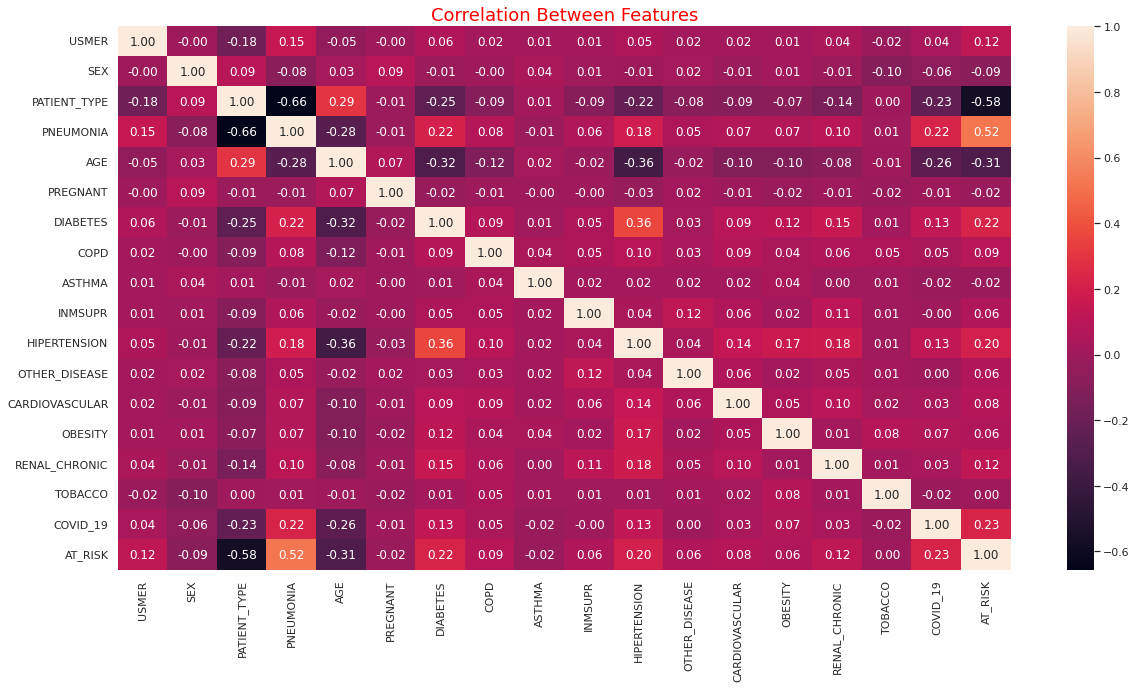

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

---
## 전처리 결과

In [ ]:
df.columns

Index(['USMER', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'COVID_19', 'AT_RISK'],
      dtype='object')

In [ ]:
df

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_19,AT_RISK
0,2,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1,1
2,2,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,2,1
4,2,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1,1
5,2,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,2,2
1048572,2,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
for i in df.columns :
  print(i)
  print("-------------------------")
  print(df[i].value_counts())
  print("-------------------------\n")

USMER
-------------------------
2    626052
1    343588
Name: USMER, dtype: int64
-------------------------

SEX
-------------------------
1    485237
2    484403
Name: SEX, dtype: int64
-------------------------

PATIENT_TYPE
-------------------------
1    803050
2    166590
Name: PATIENT_TYPE, dtype: int64
-------------------------

PNEUMONIA
-------------------------
2    847358
1    122282
Name: PNEUMONIA, dtype: int64
-------------------------

AGE
-------------------------
30     26435
31     25386
28     24708
29     24574
32     24375
       ...  
116        1
105        1
104        1
120        1
106        1
Name: AGE, Length: 109, dtype: int64
-------------------------

PREGNANT
-------------------------
2    961820
1      7820
Name: PREGNANT, dtype: int64
-------------------------

DIABETES
-------------------------
2    864670
1    104970
Name: DIABETES, dtype: int64
-------------------------

COPD
-------------------------
2    959986
1      9654
Name: COPD, dtype: int64

In [ ]:
df

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,COVID_19,AT_RISK
0,2,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,1,1
2,2,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,2,1
4,2,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,1,1
5,2,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,40,2,2,2,2,2,2,2,2,2,2,2,2,2
1048571,1,2,2,2,51,2,2,2,2,2,1,2,2,2,2,2,2,2
1048572,2,2,1,2,55,2,2,2,2,2,2,2,2,2,2,2,2,2
1048573,2,2,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2,2


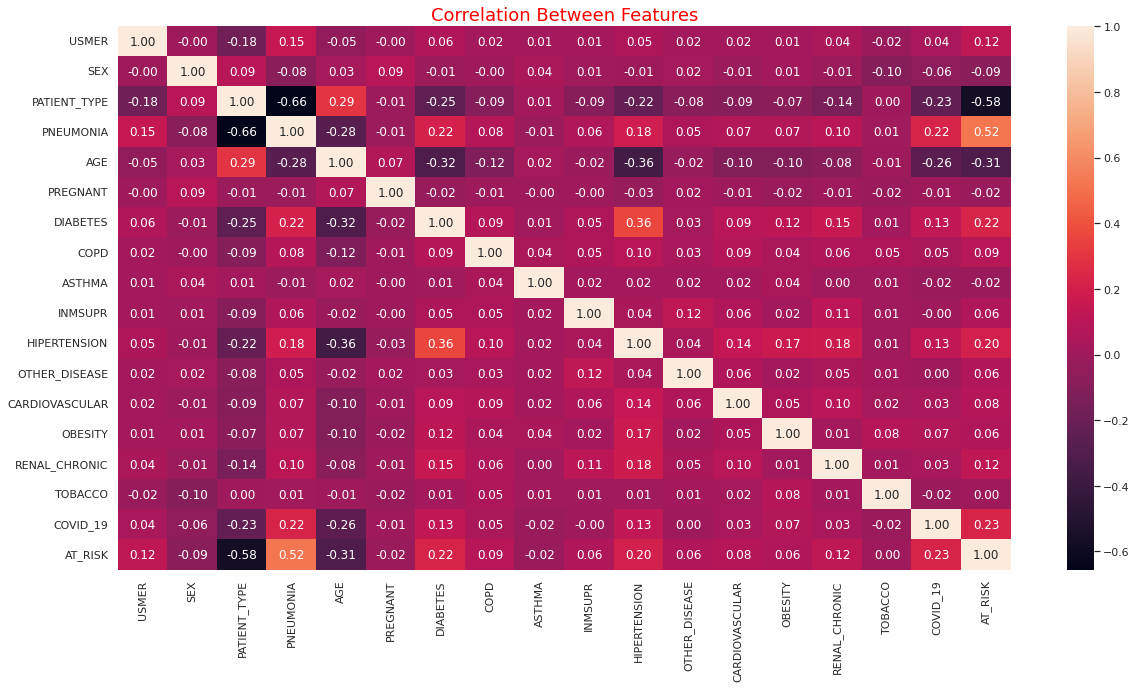

In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

--- 
### 모델 학습하기

---
# 데이터 Split하기 버전 2가지 소개


1.   기본적인 방법으로 Split하기
2.   Random Sampling을 통해 데이터 불균형을 해소한 후 split을 하기

---
### 등장 배경


*   우리가 사용하는 Target값이 DATE_DIED와 AT_RISK인데 이 값들에 대한 데이터 불균형 문제가 있음

*   DATE_DIED
  * 2 값 -> 946356
  * 1 값 -> 72511

*   AT_RISK
  * 2 값 -> 933878
  * 1 값 -> 84989

따라서 이에 대한 불균형 처리가 필요함


## 전처리 버전 1 : DATE_DIED 시각화

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


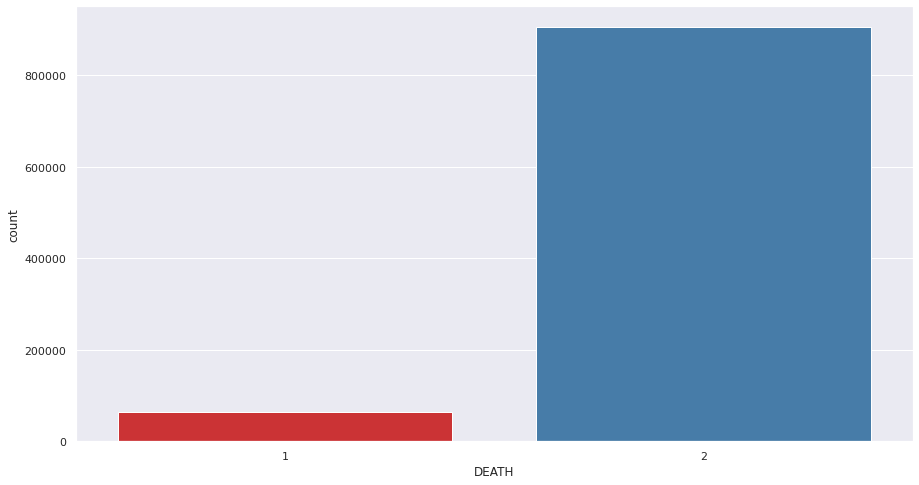

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(df.DEATH, palette='Set1')

## 전처리 버전 1 : AT_RISK 시각화

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AT_RISK Distribution')

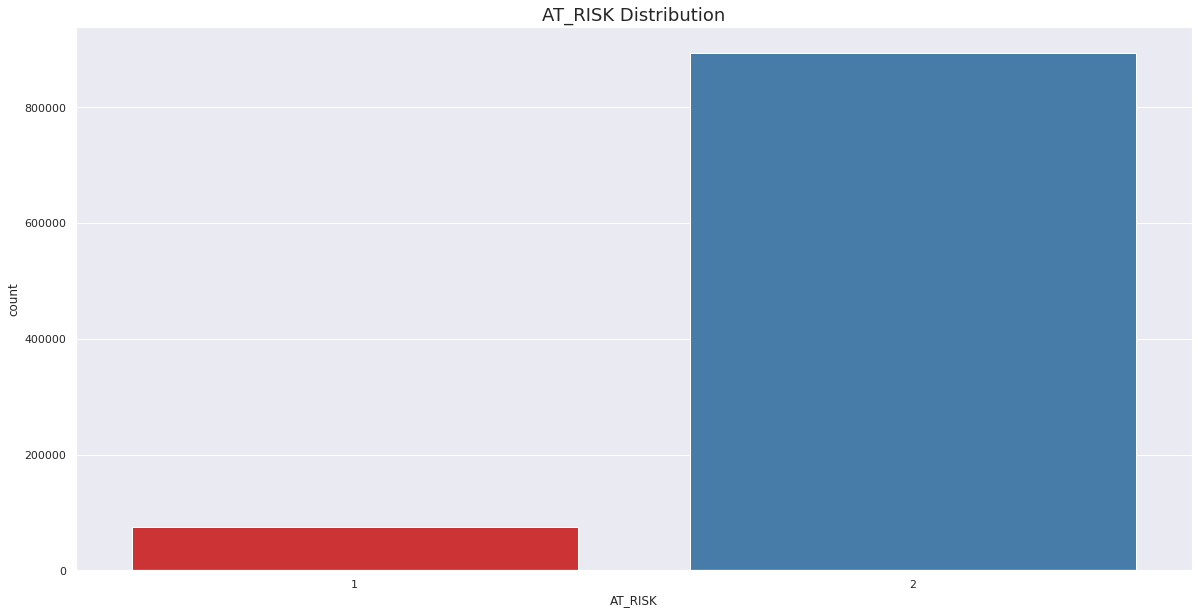

In [ ]:
ax = sns.countplot(df.AT_RISK, palette='Set1')
plt.title("AT_RISK Distribution", fontsize=18)

---
# 모델 데이터 split하기(Version_1)


In [ ]:
# 주제 1번에 관한 데이터 split
x = df.drop("DEATH", axis = 1)
y = df["DEATH"]


# # 주제 2번에 관한 데이터 split
# x = df.drop("AT_RISK", axis = 1)
# y = df["AT_RISK"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

---
# 모델 데이터 split하기(Version_2)



In [ ]:
# 주제 1번에 관한 데이터 split
x = df.drop("DEATH", axis = 1)
y = df["DEATH"]

# # 주제 2번에 관한 데이터 split
# x = df.drop("AT_RISK", axis = 1)
# y = df["AT_RISK"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


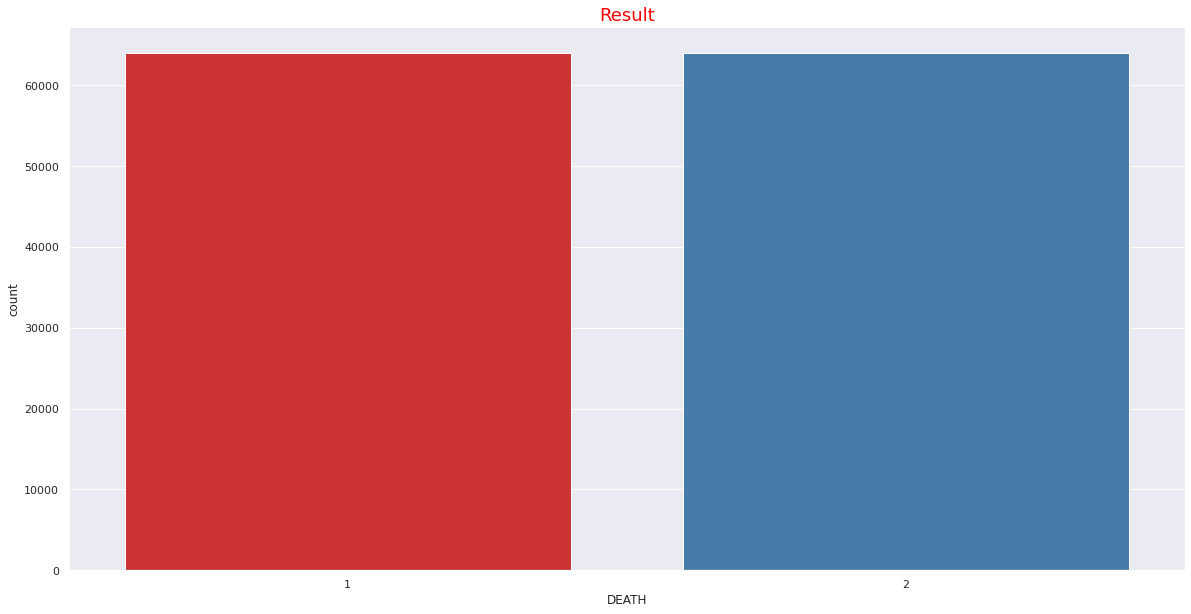

In [ ]:
ax = sns.countplot(y_resampled, palette='Set1')
plt.title("Result", fontsize=18,color="red");

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.3, random_state = 0)

---
# 알고리즘에 사용된 공통된 라이브러리 호출

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

# xgboost 알고리즘 사용

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, 
                    learning_rate=0.1)

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(xgb, x_train, y_train, scoring='accuracy', cv=kfold)
acc_list2.append(np.round(np.mean(scores), 4))
print('정확도 평균: ',np.round(np.mean(scores), 4))

NameError: ignored

# Decision Tree 알고리즘 사용

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(dtree, x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.8942


,0
0,0.8968
1,0.8968
2,0.8939
3,0.8954
4,0.8891
5,0.8973
6,0.8939
7,0.8978
8,0.8916
9,0.8891


# LogisticRegression 알고리즘 사용

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=5000)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(lr, x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.9113


,0
0,0.9172
1,0.9121
2,0.9071
3,0.9089
4,0.9109
5,0.9154
6,0.9098
7,0.9141
8,0.9059
9,0.9120


---
#NAIVE_BAYES 알고리즘 사용

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(nb, x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.8715


,0
0,0.8760
1,0.8731
2,0.8741
3,0.8724
4,0.8674
5,0.8728
6,0.8712
7,0.8698
8,0.8675
9,0.8708


---
# RIDGE CLASSIFIER 알고리즘 사용

In [ ]:
from sklearn.linear_model import RidgeClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(RidgeClassifier(), x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.9022


,0
0,0.9075
1,0.9044
2,0.9020
3,0.9009
4,0.9046
5,0.9026
6,0.9005
7,0.9011
8,0.8960
9,0.9027


---
# QDA 알고리즘 사용

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(QuadraticDiscriminantAnalysis(), x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.8678


,0
0,0.8666
1,0.8728
2,0.8696
3,0.8676
4,0.8606
5,0.8692
6,0.8672
7,0.8677
8,0.8680
9,0.8689


---
#ADA 알고리즘 사용

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(AdaBoostClassifier(), x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.9067


,0
0,0.9127
1,0.9079
2,0.9047
3,0.9042
4,0.9061
5,0.9100
6,0.9055
7,0.9086
8,0.9003
9,0.9074


---
# Random Forest 알고리즘 사용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(rf, x_train, y_train, scoring='accuracy', cv=kfold)
print('정확도 평균: ',np.round(np.mean(scores), 4))

정확도 평균:  0.9052


,0
0,0.9087
1,0.9062
2,0.9020
3,0.9060
4,0.9009
5,0.9084
6,0.9043
7,0.9103
8,0.9034
9,0.9016


---
# 최종 정확도 비교 표 생성

In [ ]:
index=["XGBoost", "decision_tree", "logistic_regression ","random_forest", "naive_bayes","ridge_classifier", "QDA", "ADA"]
accuracy_val1 = [0.9505, 0.9388, 0.9491,0.9503, 0.8991, 0.947, 0.9055, 0.9471]
accuracy_val1_1 = [0.9182, 0.8942,  0.9113, 0.9052, 0.8715, 0.9022, 0.8678,0.9067]
accuracy_val2 = [0.9324, 0.9227, 0.9311, 0.9258, 0.8845, 0.9299, 0.8851, 0.931]
accuracy_val2_1 =[0.9202, 0.9009, 0.9112,0.909, 0.8774, 0.9041, 0.896, 0.9102]

[0.9505, 0.9388, 0.9491, 0.9503, 0.8991, 0.947, 0.9055, 0.9471]


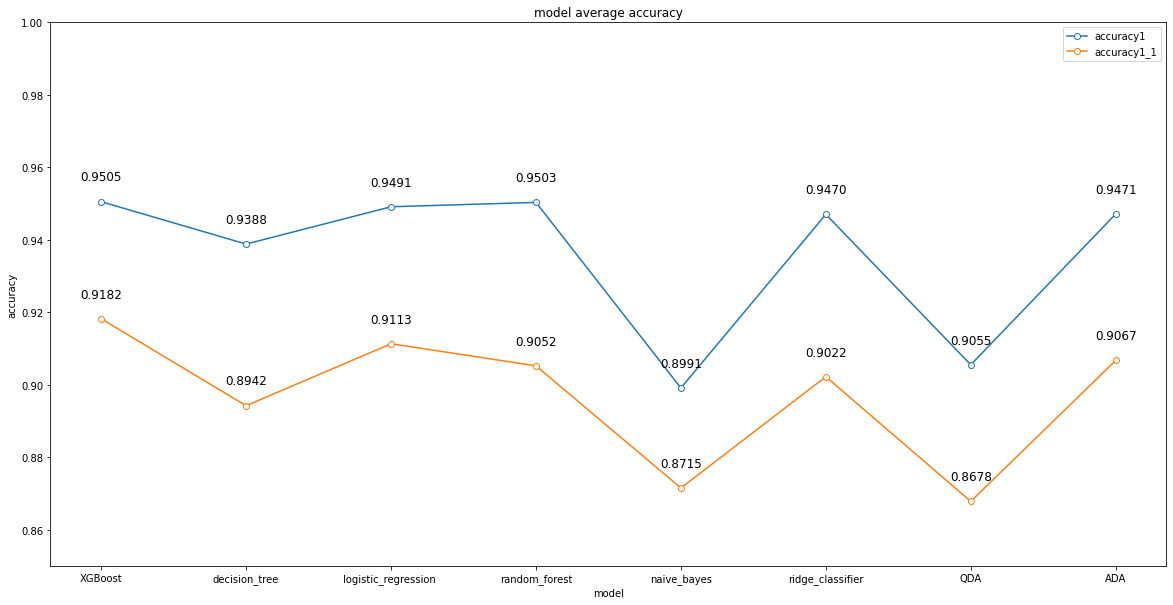

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(index, accuracy_val1,markersize=6,marker='o', markerfacecolor='white', label='accuracy1')
plt.plot(index, accuracy_val1_1,markersize=6,marker='o', markerfacecolor='white', label='accuracy1_1')

for i in range(len(index)):
    height1 = accuracy_val1[i]
    plt.text(index[i], height1 + 0.005, '%.4f' %height1, ha='center', va='bottom', size = 12)

  
for i in range(len(index)):
    height2 = accuracy_val1_1[i]
    plt.text(index[i], height2 + 0.005, '%.4f' %height2, ha='center', va='bottom', size = 12)

plt.title("model average accuracy")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.ylim(0.85, 1)

plt.legend()
plt.show()

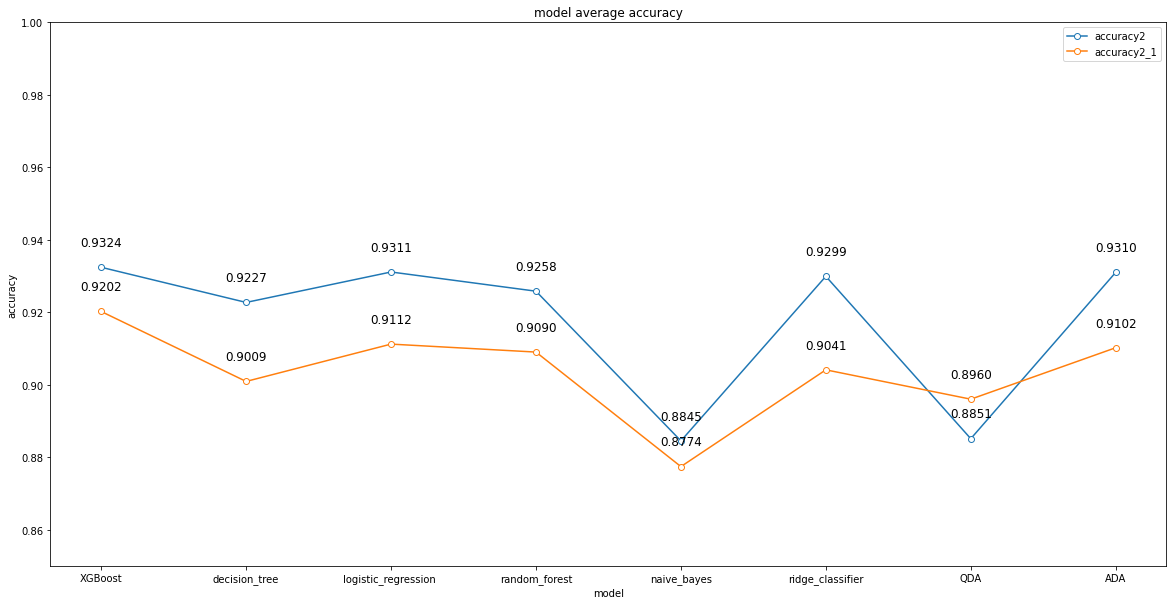

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(index, accuracy_val2,markersize=6,marker='o', markerfacecolor='white', label='accuracy2')
plt.plot(index, accuracy_val2_1,markersize=6,marker='o', markerfacecolor='white', label='accuracy2_1')

for i in range(len(index)):
    height1 = accuracy_val2[i]
    plt.text(index[i], height1 + 0.005, '%.4f' %height1, ha='center', va='bottom', size = 12)

  
for i in range(len(index)):
    height2 = accuracy_val2_1[i]
    plt.text(index[i], height2 + 0.005, '%.4f' %height2, ha='center', va='bottom', size = 12)

plt.title("model average accuracy")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.ylim(0.85, 1)

plt.legend()
plt.show()

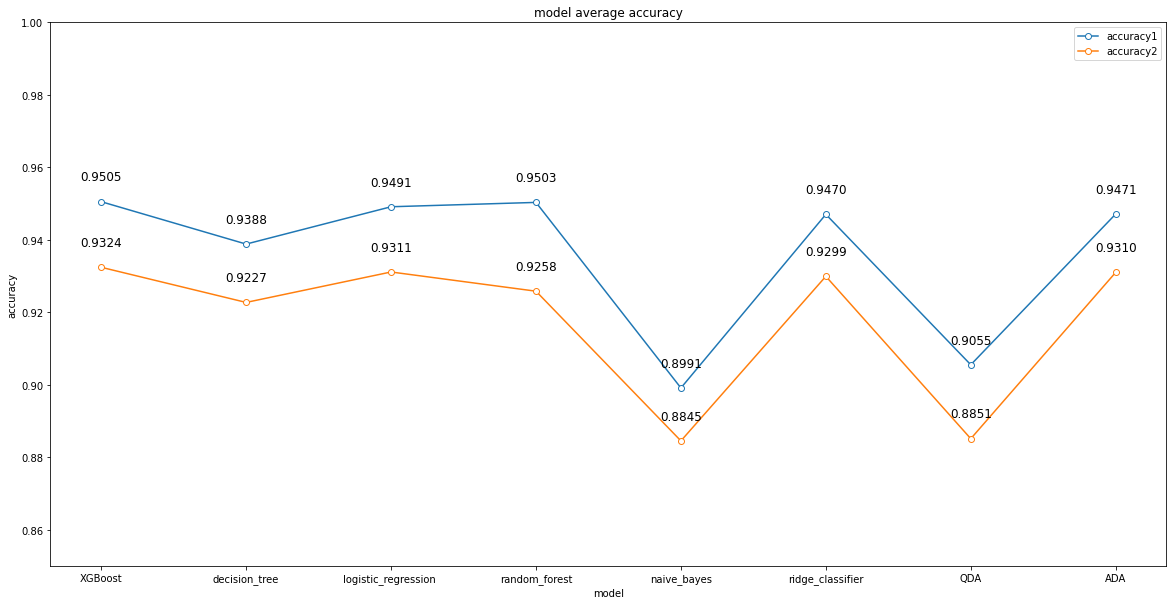

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(index, accuracy_val1,markersize=6,marker='o', markerfacecolor='white', label='accuracy1')
plt.plot(index, accuracy_val2,markersize=6,marker='o', markerfacecolor='white', label='accuracy2')

for i in range(len(index)):
    height1 = accuracy_val1[i]
    plt.text(index[i], height1 + 0.005, '%.4f' %height1, ha='center', va='bottom', size = 12)

  
for i in range(len(index)):
    height2 = accuracy_val2[i]
    plt.text(index[i], height2 + 0.005, '%.4f' %height2, ha='center', va='bottom', size = 12)

plt.title("model average accuracy")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.ylim(0.85, 1)

plt.legend()
plt.show()

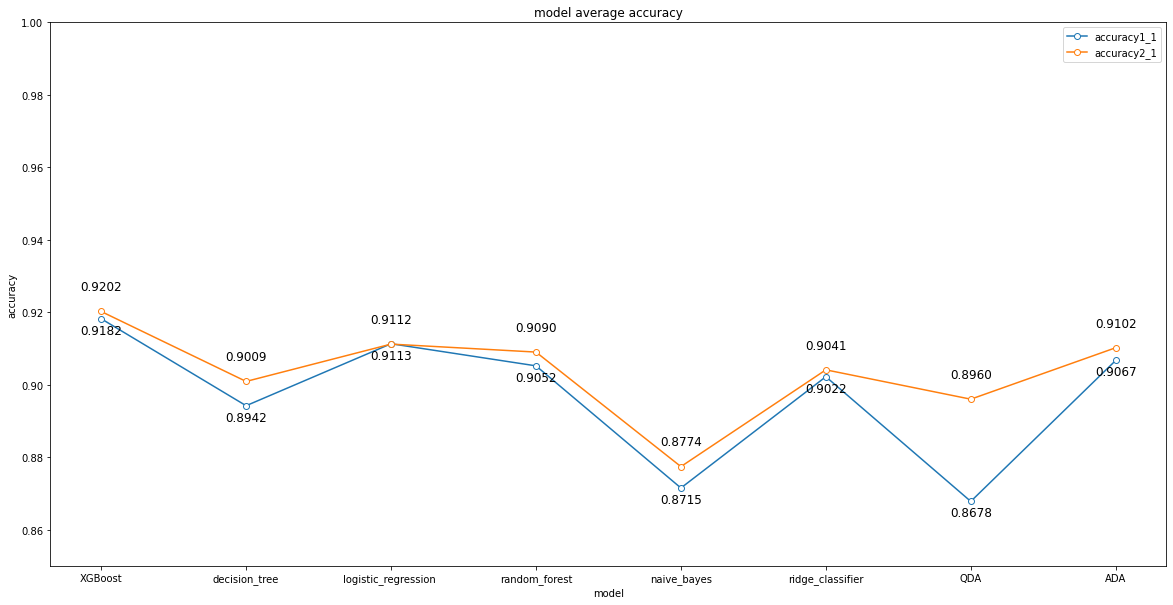

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(index, accuracy_val1_1,markersize=6,marker='o', markerfacecolor='white', label='accuracy1_1')
plt.plot(index, accuracy_val2_1,markersize=6,marker='o', markerfacecolor='white', label='accuracy2_1')

for i in range(len(index)):
    height1 = accuracy_val1_1[i]
    plt.text(index[i], height1 + 0.005, '%.4f' %height1, ha='center', va='bottom', size = 12)

  
for i in range(len(index)):
    height2 = accuracy_val2_1[i]
    plt.text(index[i], height2 - 0.005, '%.4f' %height2, ha='center', va='bottom', size = 12)

plt.title("model average accuracy")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.ylim(0.85, 1)

plt.legend()
plt.show()

In [ ]:
accuracy_val1 = pd.Series([0.9505, 0.9491, 0.9471],
              index=["XGBoost", "logistic_regression ", "ADA"])

accuracy_val1_1 = pd.Series([0.9182, 0.9113, 0.9067],
               index=["XGBoost", "logistic_regression ", "ADA"])

accuracy_val2 = pd.Series([0.9324, 0.9311, 0.9310],
               index=["XGBoost", "logistic_regression ", "ADA"])

accuracy_val2_1 = pd.Series([0.9202, 0.9112, 0.9102],
               index=["XGBoost", "logistic_regression ", "ADA"])

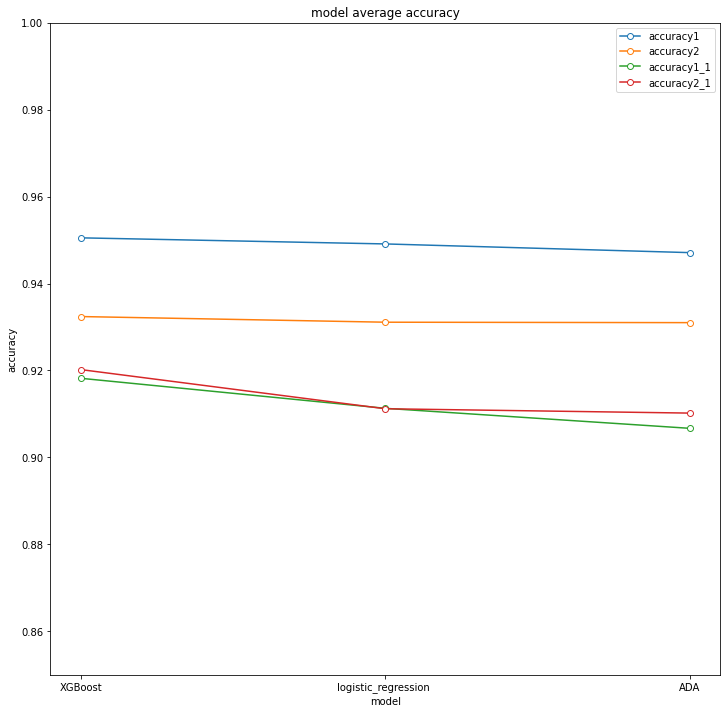

In [ ]:
plt.figure(figsize=(12, 12))
plt.plot(accuracy_val1,marker='o',markersize=6, markerfacecolor='white', label='accuracy1')
plt.plot(accuracy_val2,marker='o',markersize=6, markerfacecolor='white', label='accuracy2')
plt.plot(accuracy_val1_1,marker='o',markersize=6, markerfacecolor='white', label='accuracy1_1')
plt.plot(accuracy_val2_1,marker='o',markersize=6, markerfacecolor='white', label='accuracy2_1')
plt.title("model average accuracy")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.ylim(0.85, 1)

plt.legend()
plt.show()